# Limpieza, Análisis Exploratorio (EDA) y Feature Engineering

**Autor:** [Eduardo José Limones Contreras]

---

## 1. Objetivo de este Notebook

Continuando con el objetivo de predecir salarios en el sector de datos, en este notebook tomamos el dataset crudo cargado en el paso anterior y lo transformamos en un conjunto de datos limpio, estructurado y listo para el modelado.

Las tareas principales que se llevarán a cabo son:
1.  **Limpieza de Datos:** Identificar y manejar valores nulos, duplicados o inconsistencias en el dataset.
2.  **Análisis Exploratorio de Datos (EDA):** A través de visualizaciones, entender la distribución de las variables clave y sus relaciones con el salario.
3.  **Ingeniería de Características (Feature Engineering):** Convertir todas las variables a un formato numérico y crear nuevas características que aporten valor al modelo.

## 2. Proceso de Transformación

El proceso de feature engineering seguirá los siguientes pasos, basados en el análisis previo:

* **Filtrado de Datos:** Se acotará el dataset para analizar exclusivamente el **mercado europeo**.
* **Selección de Características:** Se realizó una selección inicial de variables, descartando aquellas con alto riesgo de fuga de datos (ej. job_id, company_name), baja relevancia predictiva (posting_date).
* **Creación de Nuevas Características:** Se generará la variable `is_international` para capturar la dinámica del trabajo remoto entre países.
* **Codificación de Variables Ordinales:** Se asignará un valor numérico a las variables con un orden inherente (`experience_level`, `company_size`, `education_required`).
* **Ingeniería de Características desde Texto:** La columna required_skills, que contenía listas de habilidades, fue procesada para identificar las 20 tecnologías más comunes en todo el dataset. A continuación, se crearon 20 nuevas columnas binarias, donde cada una indica la presencia (1) o ausencia (0) de una de estas habilidades para cada oferta de trabajo..
* **Codificación Final:** Todas las variables categóricas resultantes (incluidas las agrupadas) fueron convertidas a un formato numérico mediante la técnica de One-Hot Encoding para preparar el dataset final para el entrenamiento de los modelos..


El resultado final de este notebook será un DataFrame (`salarios_codificado`) con todas las características listas para ser usadas en el entrenamiento de un modelo de machine learning.

---

In [16]:
# IMPORTACIÓN DE LIBRERÍAS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter


%matplotlib inline

## Análisis Exploratorio sobre el DataFrame Inicial (`df`)

In [2]:
df = pd.read_csv('ai_job_dataset.csv')
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [4]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


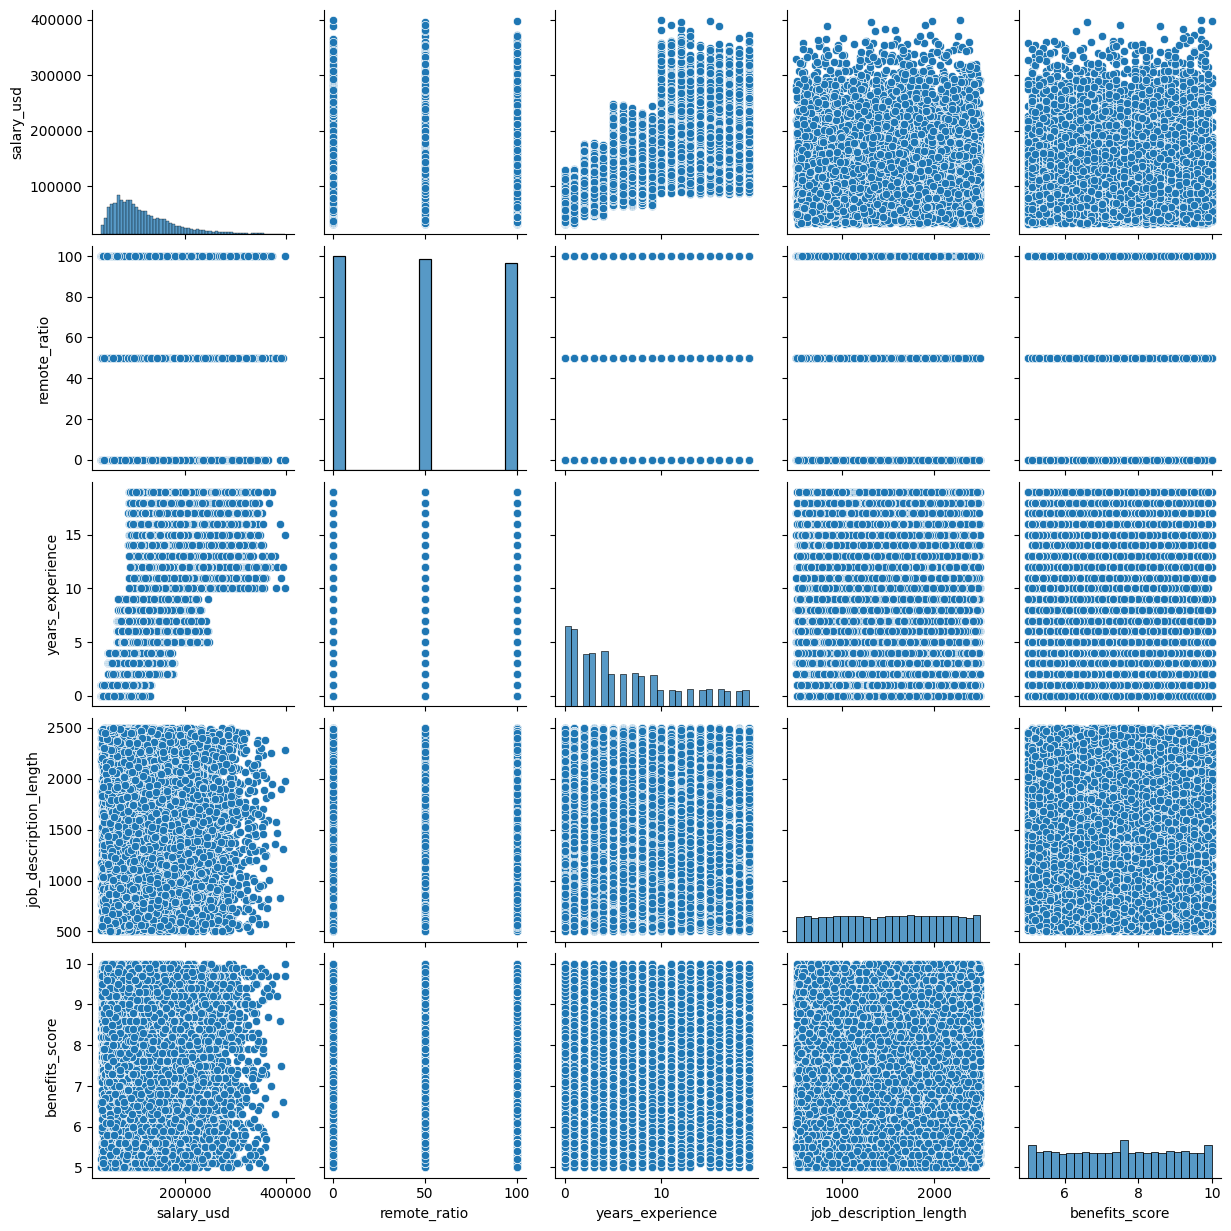

In [5]:
sns.pairplot(df)

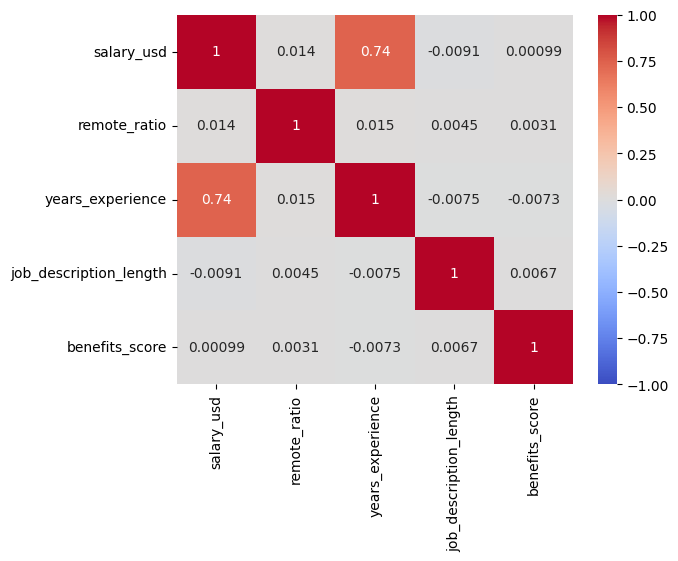

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True,vmin=-1,cmap='coolwarm');

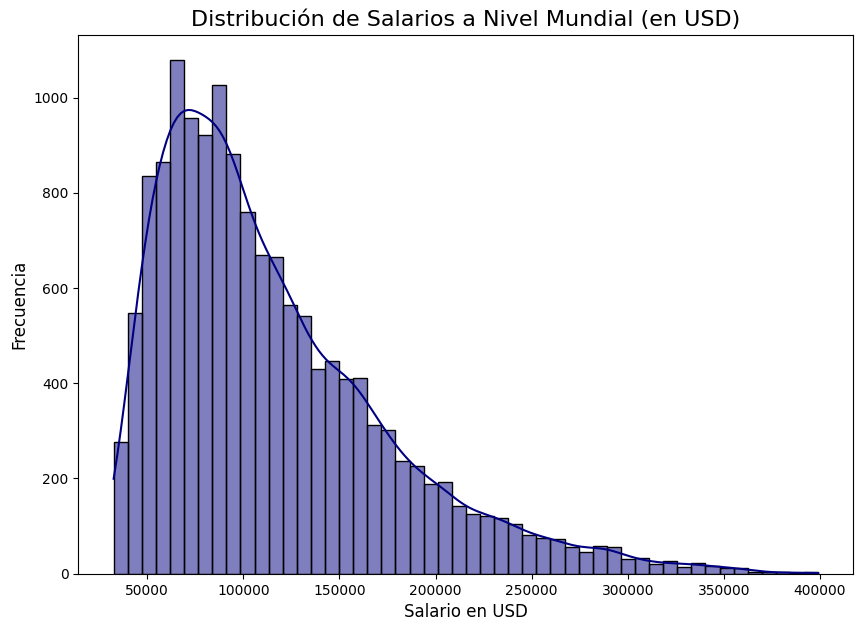

In [8]:
# Distribución de Salarios en USD
plt.figure(figsize=(10, 7))
sns.histplot(df['salary_usd'], bins=50, kde=True, color='navy')
plt.title('Distribución de Salarios a Nivel Mundial (en USD)', fontsize=16)
plt.xlabel('Salario en USD', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.savefig('distribucion_salarios_usd.png')
plt.show();


En este histograma muestra la distribución de salary_usd. como se puede observar, está fuertemente sesgada a la derecha: la gran mayoría de los salarios se concentran en la parte baja-media, y hay una "larga cola" de salarios muy altos.

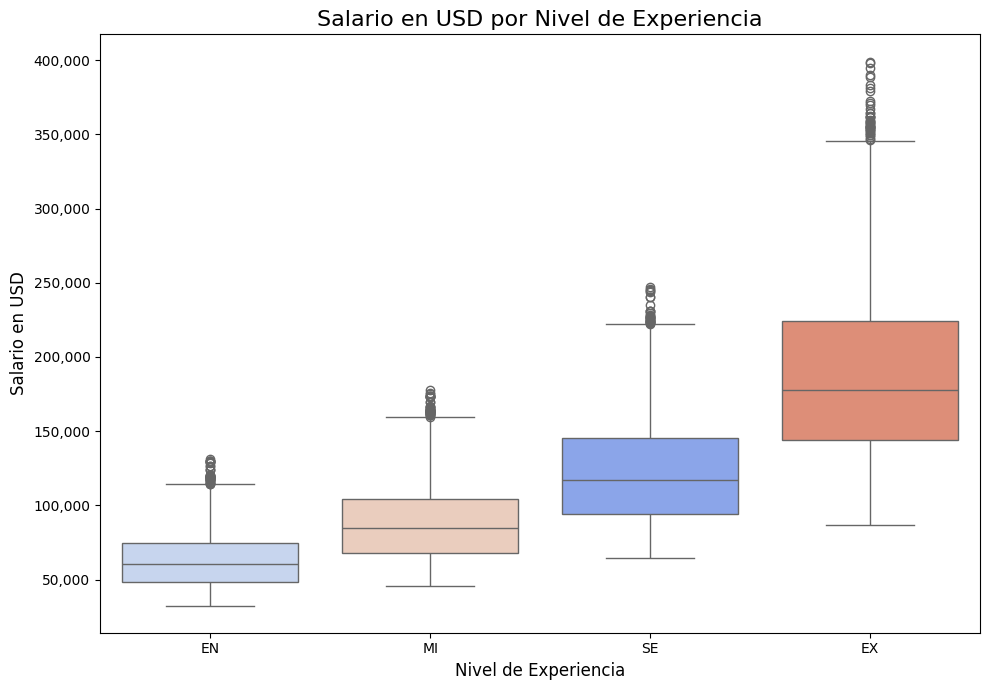

In [9]:
# Salario en USD vs. Nivel de Experiencia
plt.figure(figsize=(10, 7))
order_exp = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(x='experience_level', y='salary_usd', data=df, order=order_exp, hue='experience_level', palette='coolwarm', legend=False)
plt.title('Salario en USD por Nivel de Experiencia', fontsize=16)
plt.xlabel('Nivel de Experiencia', fontsize=12)
plt.ylabel('Salario en USD', fontsize=12)
# Formatear el eje y para mejor lectura
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig('salario_vs_experiencia.png')
plt.show();

Este boxplot confirma una de nuestras hipótesis más importantes. Hay una progresión salarial clara y positiva a medida que aumenta el nivel de experiencia, desde Junior (EN) hasta Ejecutivo (EX). La mediana del salario sube con cada escalón.

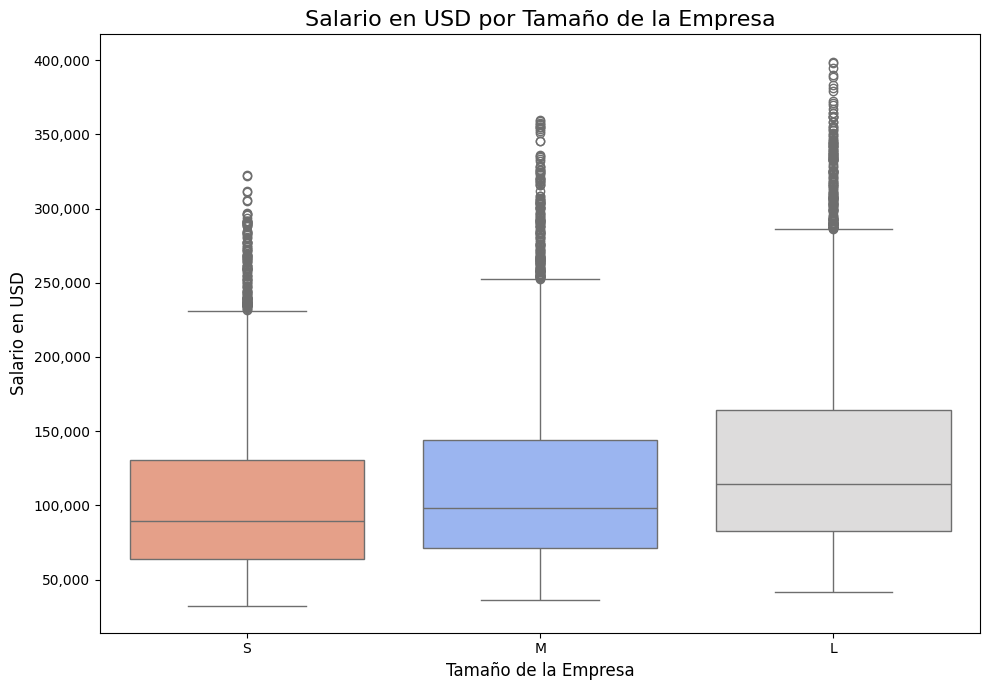

In [10]:
#Salario en USD vs. Tamaño de la Empresa
plt.figure(figsize=(10, 7))
order_size = ['S', 'M', 'L']
sns.boxplot(x='company_size', y='salary_usd', data=df, order=order_size, hue='company_size', palette='coolwarm', legend=False)
plt.title('Salario en USD por Tamaño de la Empresa', fontsize=16)
plt.xlabel('Tamaño de la Empresa', fontsize=12)
plt.ylabel('Salario en USD', fontsize=12)
# Formatear el eje y para mejor lectura
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig('salario_vs_tamano_empresa.png')
plt.show();

Aquí vemos que las empresas medianas (M) y grandes (L) tienden a pagar salarios más altos que las pequeñas (S). Esto sugiere que el tamaño de la empresa es una característica relevante que debemos incluir en nuestro modelo.

## Limpieza y Feature Engineering

Basándonos en los hallazgos del Análisis Exploratorio de Datos (EDA), procedemos ahora con la fase de limpieza y transformación del dataset. El objetivo de esta sección es convertir nuestro conjunto de datos crudo en un formato estructurado, numérico y optimizado para el entrenamiento de un modelo de machine learning.

Al final de este proceso, tendremos un DataFrame completamente limpio y listo para la fase de modelado.

A continuación, se procederá con la codificación de las variables categóricas. Para aquellas con una jerarquía intrínseca, como education_required, experience_level y company_size, se aplicará una codificación ordinal para preservar su orden natural.

In [17]:
mapeo_educacion = {
    'Associate': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}
df['education_encoded'] = df['education_required'].map(mapeo_educacion)

df.drop(columns=['education_required'], inplace=True)

In [18]:
mapeo_experiencia = {
    'EN': 0,
    'MI': 1,
    'SE': 2,
    'EX': 3
}

df['experience_level_encoded'] = df['experience_level'].map(mapeo_experiencia)
df.drop('experience_level', axis=1, inplace=True)


In [19]:
mapeo_tamaño = {
    'S': 0,
    'M': 1,
    'L': 2
}

df['company_size'] = df['company_size'].map(mapeo_tamaño)

Ahora se generará la característica is_international, una variable booleana que indicará si un contrato es internacional

In [20]:
df['is_international'] = (df['employee_residence'] != df['company_location']).astype(int)
# Eliminar la columna de residencia del empleado
df.drop('employee_residence', axis=1, inplace=True)

A continuación, se acotará el alcance del estudio seleccionando únicamente las entradas correspondientes a los países que utilizan el Euro como moneda.

In [21]:
df['company_location'].value_counts()

company_location
Germany           814
Denmark           778
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Japan             733
Finland           733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64

In [22]:
# Lista completa de países zona Euro.
paises_europa = [

    'Austria',
    'Finland',
    'France',
    'Germany',
    'Ireland',
    'Netherlands'

] 

# Filtrar el DataFrame original para quedarnos solo con las filas de Europa
df = df[df['company_location'].isin(paises_europa)].copy()
df.reset_index(inplace=True)

Ahora vamos a sacar los dummies de las siguientes columnas: `company_location`, `industry`, `employment_type` y `job_title`.

In [23]:
df = pd.get_dummies(df, columns=['company_location'], prefix='loc')
df = pd.get_dummies(df, columns=['industry'], drop_first=True)
df = pd.get_dummies(df, columns=['employment_type'], drop_first=True)

In [24]:
# Identificar los 20 puestos de trabajo más comunes
top_20_puestos = df['job_title'].value_counts().nlargest(20).index
# Agrupar todos los demás puestos en la categoría 'Other'
df.loc[~df['job_title'].isin(top_20_puestos), 'job_title'] = 'Other'

df = pd.get_dummies(df, columns=['job_title'], drop_first=True)

A continuación, se procesará la variable required_skills, identificada como una de las más importantes, para extraer las competencias tecnológicas individuales y convertirlas en un formato apto para el modelado.

In [ ]:
# Dividimos las cadenas de texto por la coma y creamos una lista de listas
lista_de_skills = df['required_skills'].str.split(', ')

# Aplanamos la lista de listas en una sola lista con todas las skills
skills_totales = [skill for sublist in lista_de_skills for skill in sublist if skill]

# Contamos la frecuencia de cada skill
conteo_skills = Counter(skills_totales)

# Nos quedamos con las 20 skills más comunes
top_skills = [skill for skill, count in conteo_skills.most_common(20)]
print("Las 20 habilidades más demandadas son:")
print(top_skills)

# Crear las Nuevas Columnas Binarias

for skill in top_skills:
    # Creamos una nueva columna para cada skill top
    df[f'skill_{skill.replace(" ", "_")}'] = df['required_skills'].str.contains(skill, case=False, na=False).astype(int)

Las 20 habilidades más demandadas son:
['Python', 'SQL', 'TensorFlow', 'Kubernetes', 'Scala', 'Linux', 'PyTorch', 'Git', 'Java', 'Tableau', 'Hadoop', 'GCP', 'R', 'Data Visualization', 'Computer Vision', 'Deep Learning', 'Spark', 'MLOps', 'Azure', 'NLP']


Se normalizará la característica remote_ratio y se definirá la columna salary_EUR como la variable objetivo del modelo, asegurando la consistencia monetaria en el análisis.

In [26]:
# Dividimos la columna por 100 para normalizarla entre 0 y 1
df['remote_ratio'] = df['remote_ratio'] / 100

In [27]:
# Definimos el tipo de cambio
cambio_usd_eur = 0.88
# Creamos una nueva columna en euros
df['salary_EUR'] = df['salary_usd'] * cambio_usd_eur

In [28]:
columnas_a_eliminar = [
    'index',  # El índice antiguo que se guardó como columna
    'job_id',
    'company_name',
    'posting_date',
    'application_deadline',
    'job_description_length',
    'required_skills',
    'salary_usd', 
    'salary_currency'
]

# 2. Eliminar las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

In [30]:
df.to_csv('salarios_codificado.csv', index=False) #Guardo el DataFrame como CSV

## Análisis Exploratorio sobre el DataFrame Final

Con el dataset ya filtrado, limpio y con las nuevas características diseñadas, realizamos un último análisis visual. El objetivo es confirmar las relaciones entre nuestras variables finales y la variable objetivo (`salary_EUR`) para asegurarnos de que el dataset es coherente y está listo para la fase de modelado.

In [31]:
df_final = pd.read_csv('salarios_codificado.csv')
df_final.head()

,company_size,remote_ratio,years_experience,benefits_score,education_encoded,experience_level_encoded,is_international,loc_Austria,loc_Finland,loc_France,...,skill_GCP,skill_R,skill_Data_Visualization,skill_Computer_Vision,skill_Deep_Learning,skill_Spark,skill_MLOps,skill_Azure,skill_NLP,salary_EUR
0,0,1.0,0,6.6,2,0,1,False,False,True,...,0,0,0,0,0,0,1,0,0,48069.12
1,1,0.5,7,5.9,0,2,0,False,False,False,...,0,1,1,0,0,0,0,0,0,108745.12
2,2,0.0,0,7.6,2,0,0,False,False,True,...,0,1,0,1,0,0,0,1,0,62163.20
3,1,0.0,5,5.8,2,2,0,True,False,False,...,1,1,0,0,0,0,1,1,0,90250.16
4,1,1.0,5,5.2,3,2,0,False,False,True,...,0,1,0,0,0,0,0,0,0,109432.40


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   company_size                           4562 non-null   int64  
 1   remote_ratio                           4562 non-null   float64
 2   years_experience                       4562 non-null   int64  
 3   benefits_score                         4562 non-null   float64
 4   education_encoded                      4562 non-null   int64  
 5   experience_level_encoded               4562 non-null   int64  
 6   is_international                       4562 non-null   int64  
 7   loc_Austria                            4562 non-null   bool   
 8   loc_Finland                            4562 non-null   bool   
 9   loc_France                             4562 non-null   bool   
 10  loc_Germany                            4562 non-null   bool   
 11  loc_

In [34]:
df_final.describe()

,company_size,remote_ratio,years_experience,benefits_score,education_encoded,experience_level_encoded,is_international,skill_Python,skill_SQL,skill_TensorFlow,...,skill_GCP,skill_R,skill_Data_Visualization,skill_Computer_Vision,skill_Deep_Learning,skill_Spark,skill_MLOps,skill_Azure,skill_NLP,salary_EUR
count,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,...,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000
mean,0.996054,0.492218,6.272468,7.493819,1.479176,1.507453,0.285840,0.298553,0.222052,0.204735,...,0.163744,0.848751,0.153880,0.149934,0.148838,0.145112,0.144893,0.142481,0.142262,91536.012258
std,0.814515,0.408331,5.534376,1.438194,1.118943,1.111445,0.451863,0.457674,0.415671,0.403552,...,0.370084,0.358331,0.360873,0.357046,0.355968,0.352252,0.352031,0.349581,0.349357,44359.191061
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28636.960000
25%,0.000000,0.000000,2.000000,6.300000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57397.340000
50%,1.000000,0.500000,4.000000,7.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80495.360000
75%,2.000000,1.000000,10.000000,8.700000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115670.940000
max,2.000000,1.000000,19.000000,10.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,272581.760000


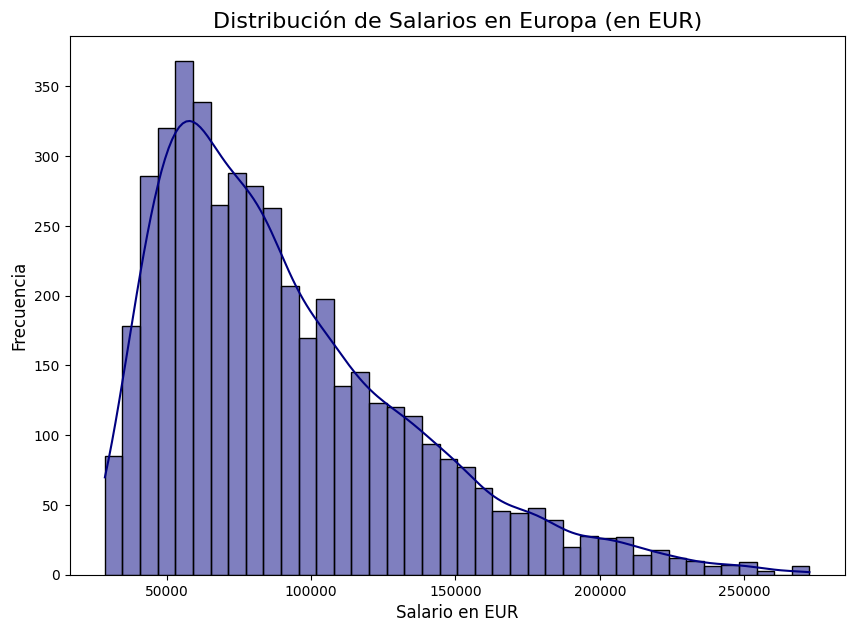

In [35]:
# Distribución de Salarios en Europa
plt.figure(figsize=(10, 7))
sns.histplot(df_final['salary_EUR'], bins=40, kde=True, color='navy')
plt.title('Distribución de Salarios en Europa (en EUR)', fontsize=16)
plt.xlabel('Salario en EUR', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.savefig('distribucion_salarios_europa.png')
plt.show();

Al igual que en el dataset global, la distribución de salarios en Europa está sesgada a la derecha. La mayoría de los salarios se agrupan en la parte inferior de la escala, con una cola de salarios más altos. Esto es típico en los datos salariales.

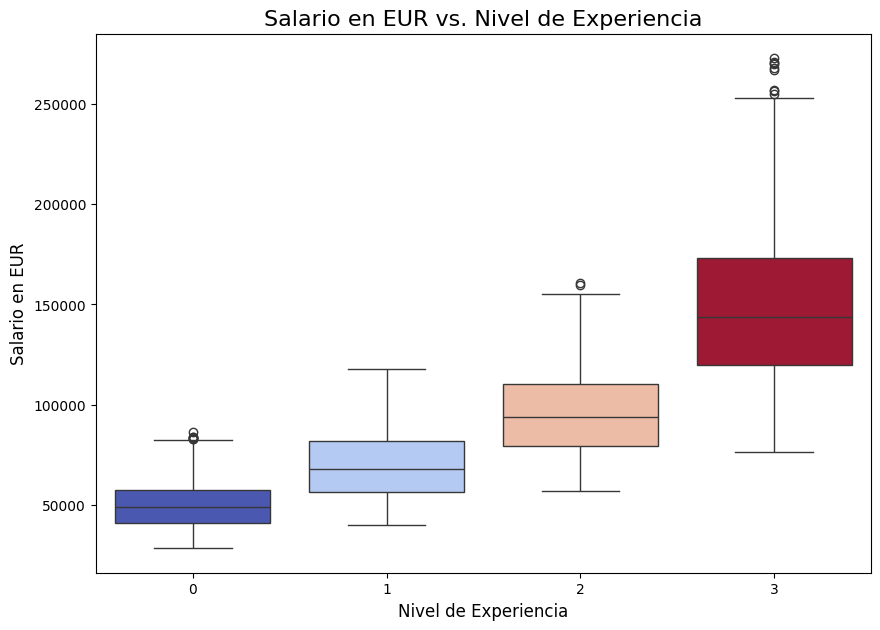

In [36]:
# Salario en EUR vs. Nivel de Experiencia
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='experience_level_encoded', y='salary_EUR', data=df_final, palette='coolwarm', hue='experience_level_encoded')
ax.get_legend().remove()
plt.title('Salario en EUR vs. Nivel de Experiencia', fontsize=16)
plt.xlabel('Nivel de Experiencia', fontsize=12)
plt.ylabel('Salario en EUR', fontsize=12)
plt.savefig('salario_europa_vs_experiencia.png')
plt.show();

La tendencia se mantiene y se ve aún más clara. La progresión salarial desde el nivel de entrada (0) hasta el ejecutivo (3) es muy marcada. Esto confirma que la experiencia es, probablemente, el predictor más fuerte del salario.

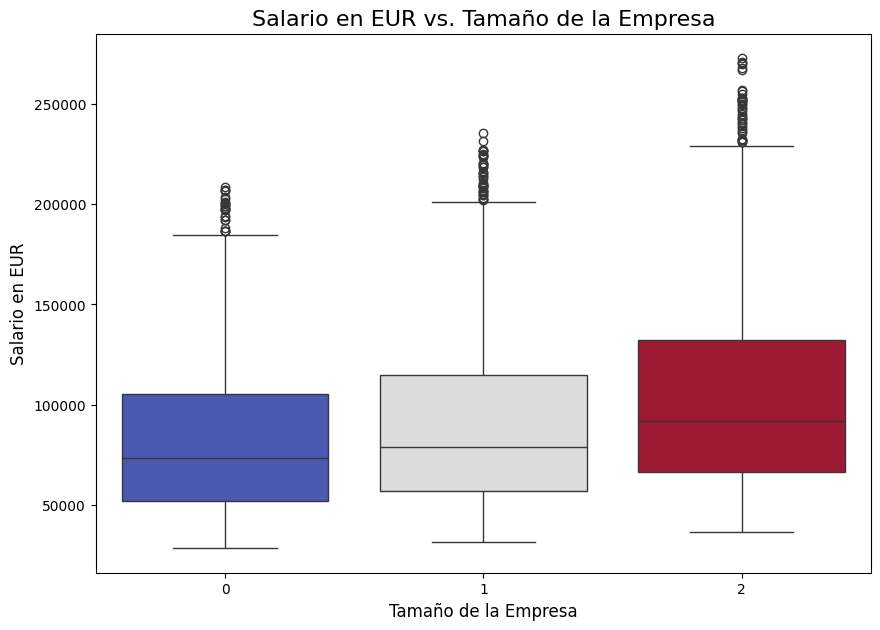

In [37]:
# Salario en EUR vs. Tamaño de la Empresa
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='company_size', y='salary_EUR', data=df_final, palette='coolwarm', hue='company_size')
ax.get_legend().remove()
plt.title('Salario en EUR vs. Tamaño de la Empresa', fontsize=16)
plt.xlabel('Tamaño de la Empresa', fontsize=12)
plt.ylabel('Salario en EUR', fontsize=12)
plt.savefig('salario_europa_vs_tamano_empresa.png')
plt.show();

En Europa, las empresas grandes (2) pagan salarios notablemente más altos que las pequeñas (0) y medianas (1). La diferencia entre pequeñas y medianas no parece ser tan significativa como la diferencia entre medianas y grandes.